# Python Summary
## Notebook:7 EDA

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
train=pd.read_csv(r'/home/aarush100616/Downloads/Projects/DS stuff/Python basics/train.csv')

In [118]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [119]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [120]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

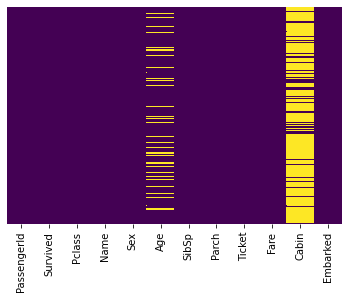

In [121]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

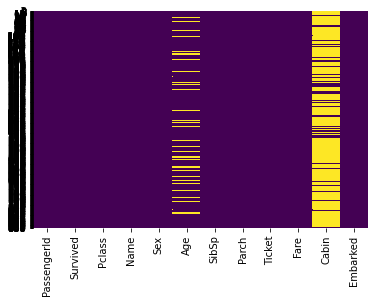

In [122]:
sns.heatmap(train.isnull(),yticklabels=True,xticklabels=True,cbar=False,cmap='viridis')

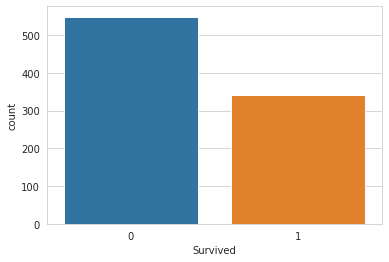

In [123]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

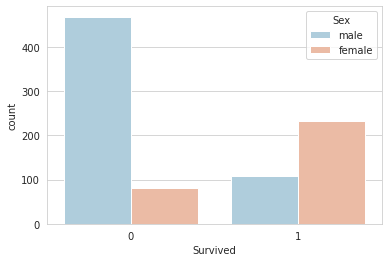

In [124]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

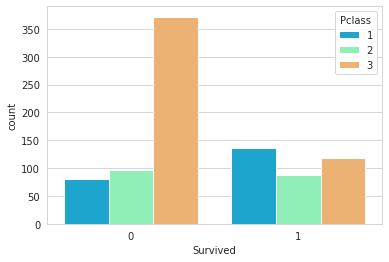

In [125]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


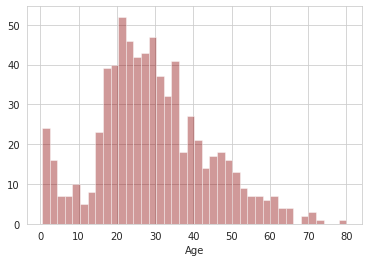

In [126]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

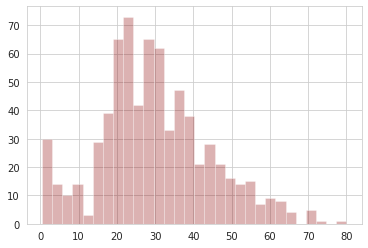

In [127]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

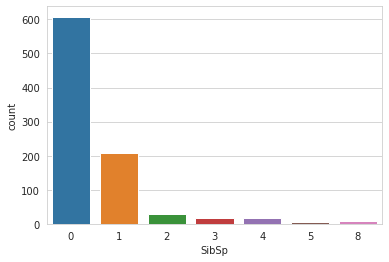

In [128]:
sns.countplot(x='SibSp',data=train)

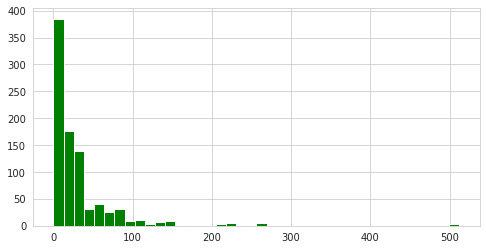

In [129]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#### Cufflinks for plot

In [130]:
import cufflinks as cf
cf.go_offline()

In [131]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

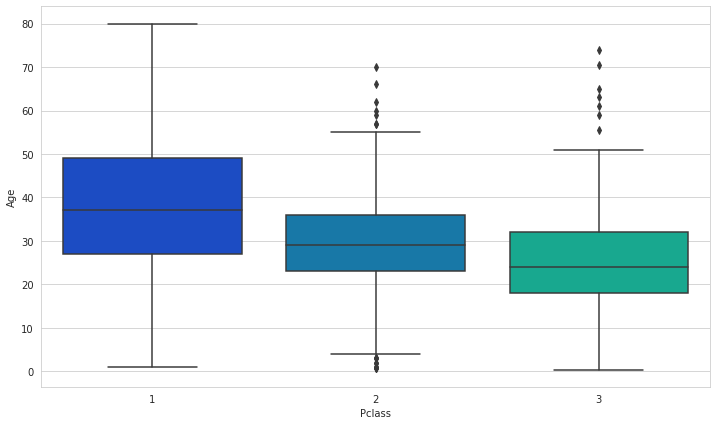

In [132]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [133]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            return Age

In [134]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

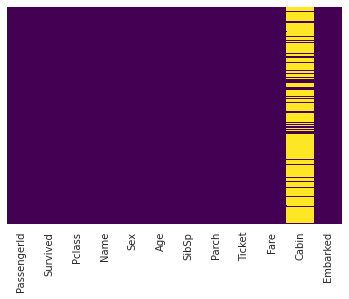

In [135]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [136]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
train.dropna(inplace=True)

In [138]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [140]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   202.000000  202.000000  202.000000  202.000000  202.000000   
mean    455.495050    0.663366    1.198020   35.630792    0.445545   
std     249.704228    0.473732    0.528205   14.943646    0.630490   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.250000    0.000000    1.000000   25.000000    0.000000   
50%     457.500000    1.000000    1.000000   36.000000    0.000000   
75%     681.500000    1.000000    1.000000   46.750000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  202.000000  202.000000  
mean     0.440594   76.103301  
std      0.732294   74.759941  
min      0.000000    0.000000  
25%      0.000000   28.959375  
50%      0.000000   55.000000  
75%      1.000000   89.776050  
max      4.000000  512.329200

In [141]:
train.describe().T

count        mean         std   min         25%    50%  \
PassengerId  202.0  455.495050  249.704228  2.00  263.250000  457.5   
Survived     202.0    0.663366    0.473732  0.00    0.000000    1.0   
Pclass       202.0    1.198020    0.528205  1.00    1.000000    1.0   
Age          202.0   35.630792   14.943646  0.92   25.000000   36.0   
SibSp        202.0    0.445545    0.630490  0.00    0.000000    0.0   
Parch        202.0    0.440594    0.732294  0.00    0.000000    0.0   
Fare         202.0   76.103301   74.759941  0.00   28.959375   55.0   

                   75%       max  
PassengerId  681.50000  890.0000  
Survived       1.00000    1.0000  
Pclass         1.00000    3.0000  
Age           46.75000   80.0000  
SibSp          1.00000    3.0000  
Parch          1.00000    4.0000  
Fare          89.77605  512.3292

In [142]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

Q  S
1   0  0
3   0  1
6   0  1
10  0  1
11  0  1

In [143]:

sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [144]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [145]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Cabin
1             2         1       1  38.0      1      0  71.2833   C85
3             4         1       1  35.0      1      0  53.1000  C123
6             7         0       1  54.0      0      0  51.8625   E46
10           11         1       3   4.0      1      1  16.7000    G6
11           12         1       1  58.0      0      0  26.5500  C103

In [146]:
train=pd.concat([train,sex,embark],axis=1)

In [147]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Cabin  male  Q  \
1             2         1       1  38.0      1      0  71.2833   C85     0  0   
3             4         1       1  35.0      1      0  53.1000  C123     0  0   
6             7         0       1  54.0      0      0  51.8625   E46     1  0   
10           11         1       3   4.0      1      1  16.7000    G6     0  0   
11           12         1       1  58.0      0      0  26.5500  C103     0  0   

    S  
1   0  
3   1  
6   1  
10  1  
11  1

### Building my model

In [148]:
train.drop('Survived',axis=1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare Cabin  male  Q  S
1             2       1  38.0      1      0  71.2833   C85     0  0  0
3             4       1  35.0      1      0  53.1000  C123     0  0  1
6             7       1  54.0      0      0  51.8625   E46     1  0  1
10           11       3   4.0      1      1  16.7000    G6     0  0  1
11           12       1  58.0      0      0  26.5500  C103     0  0  1

In [149]:
train['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),
                                              train['Survived'],test_size=0.30,
                                              random_state=101)

### Functions in Python

In [152]:
num=24
if num%2==0:
    print("Even")
else:
    print("odd")

Even


In [153]:
def even_odd(num):
    if num%2==0:
        print("Even")
    else:
        print("odd")

In [154]:
even_odd(24)

Even


In [155]:
def hello_world():
    print("Hello Welcome")

In [156]:
hello_world()

Hello Welcome


In [157]:
def add_number(num1,num2):
    return num1+num2

In [158]:
val=add_number(24,48)

In [159]:
print(val)

72


In [160]:
## positional argument
## key-value argument
def hello(name,age=21):
    print("My name is {} and age is {}".format(name,age))

In [161]:
hello('Aarush')

My name is Aarush and age is 21


In [162]:
def hello(*args,**kwargs):
    print(args)
    print(kwargs)

In [163]:
hello("aarush","kumar",age=21,dob=2000)

('aarush', 'kumar')
{'age': 21, 'dob': 2000}


In [164]:
lst=['Aarush','Kumar']
dict_args={'age': 21, 'dob': 2000}

In [165]:
hello(lst,dict_args)

(['Aarush', 'Kumar'], {'age': 21, 'dob': 2000})
{}


In [166]:
hello(*lst,**dict_args)

('Aarush', 'Kumar')
{'age': 21, 'dob': 2000}


In [167]:
lst=[1,2,3,4,5,6,7]

In [168]:
def evenoddsum(lst):
    even_sum=0;
    odd_sum=0;
    for i in lst:
        if i%2==0:
            even_sum=even_sum+i
        else:
            odd_sum=odd_sum+i
    return even_sum,odd_sum

In [169]:
evenoddsum(lst)

(12, 16)

### MAP function in Python

In [170]:
def even_or_odd(num):
    if num%2==0:
        return "The {} is Even".format(num)
    else:
        return "The {} is Odd".format(num)

In [171]:
even_or_odd(25)

'The 25 is Odd'

In [172]:
lst=[1,2,3,4,5,6,7,8,9,24,58,99]

In [173]:
list(map(even_or_odd,lst))

['The 1 is Odd',
 'The 2 is Even',
 'The 3 is Odd',
 'The 4 is Even',
 'The 5 is Odd',
 'The 6 is Even',
 'The 7 is Odd',
 'The 8 is Even',
 'The 9 is Odd',
 'The 24 is Even',
 'The 58 is Even',
 'The 99 is Odd']

### Lambda Function

In [174]:
def addition(a,b):
    return a+b

In [175]:
addition(4,5)

9

In [176]:
add=lambda a,b:a+b

In [177]:
add(7,13)

20

In [178]:
def even(num):
    if num%2==0:
        return True

In [179]:
even(24)

True

In [180]:
even=lambda a:a%2==0

In [181]:
even(13)

False

In [182]:
def addition(x,y,z):
    return x+y+z 

In [183]:
addition(2,3,5)

10

In [184]:
add1=lambda x,y,z:x+y+z

In [185]:
add1(12,4,4)

20

### Filter Function in Python

In [186]:
def even(num):
    if num%2==0:
        return True

In [187]:
lst=[1,2,3,4,5,6,7,8,9]

In [188]:
filter(even,lst)

In [189]:
list(filter(even,lst))

[2, 4, 6, 8]

In [190]:
filter(lambda num:num%2==0,lst)

In [191]:
list(filter(lambda num:num%2==0,lst))

[2, 4, 6, 8]

In [192]:
list(map(lambda num:num%2==0,lst))

[False, True, False, True, False, True, False, True, False]

### List Comprehension
List comprehension provides a comprehensive way to create lists. It consists of brackets containing an expression followed by a for clause, then zero or more for or if clause. The expression can be anything, meaning all kind of objects can be there in clause.

In [193]:
lst=[]
def lst_square(lst):
    for i in lst:
        lst1.append(i*i)
    return lst1

In [194]:
lst_square([1,2,3,4,5,6,7,8,9,99])

[1, 2, 3, 4, 5, 1, 4, 9, 16, 25, 36, 49, 64, 81, 9801]

In [195]:
lst=[2,5,8,3,6,9,1,4,7]

In [196]:
[i*i for i in lst]

[4, 25, 64, 9, 36, 81, 1, 16, 49]

## String formatting in Python

In [197]:
print("Hello Everyone!")

Hello Everyone!


In [198]:
def greeting(name):
    return "Hello {}.Welcome to the community".format(name)

In [199]:
greeting("Aarush")

'Hello Aarush.Welcome to the community'

In [200]:
def welcome_email(firstname,lastname):
    return "Welcome {}.Everyone please welcome {}".format(firstname,lastname)

In [201]:
welcome_email("Aarush","Kumar")

'Welcome Aarush.Everyone please welcome Kumar'

In [202]:
def welcome_name(name,age):
    return "Welcome {name}.Your age is {age}".format(age=age,name=name)

In [203]:
welcome_name("Aarush",21)

'Welcome Aarush.Your age is 21'

### Python list Iterables vs Iterators

In [204]:
ls=[1,2,3,4,5,6,7]
for i in ls:
    print(i)#iterate

1
2
3
4
5
6
7


In [205]:
iter(ls)#convert lst into iterator

In [206]:
lst=iter(ls)

In [207]:
lst

In [208]:
next(lst)

1

In [209]:
next(lst)

2

In [211]:
for i in lst:
    print(i)

3
4
5
6
7


### Pyforest- all import of DataScience libraries

In [212]:
active_imports()

[]

In [213]:
lst1=[1,2,3,4,5,6]
lst2=[7,8,9,10,11,12]

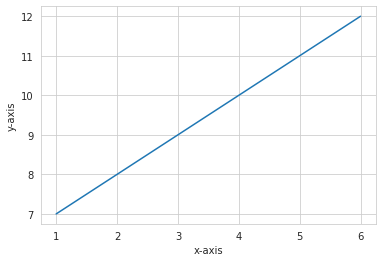

In [214]:
plt.plot(lst1,lst2)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [215]:
active_imports()

[]

In [216]:
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])